In [1]:
import numpy as np
import pandas as pd 
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
x=iris.data
y=iris.target

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # 'long' for classification
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [11]:
class ANN(nn.Module):


    def __init__(self,input_dim,num_classes):
        super(ANN,self).__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,num_classes)

        )

    def forward(self,x):
        return self.model(x)

In [12]:
model = ANN(input_dim=x_train.shape[1], num_classes=3)
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [13]:
epochs = 300
errors=[]

for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    errors.append([epoch+1, loss])
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/300], Loss: 0.9108
Epoch [100/300], Loss: 0.3588
Epoch [150/300], Loss: 0.0801
Epoch [200/300], Loss: 0.0651
Epoch [250/300], Loss: 0.0612
Epoch [300/300], Loss: 0.0588


In [14]:
epochs_list, loss_values = zip(*errors)
loss_values=torch.tensor(loss_values).numpy()


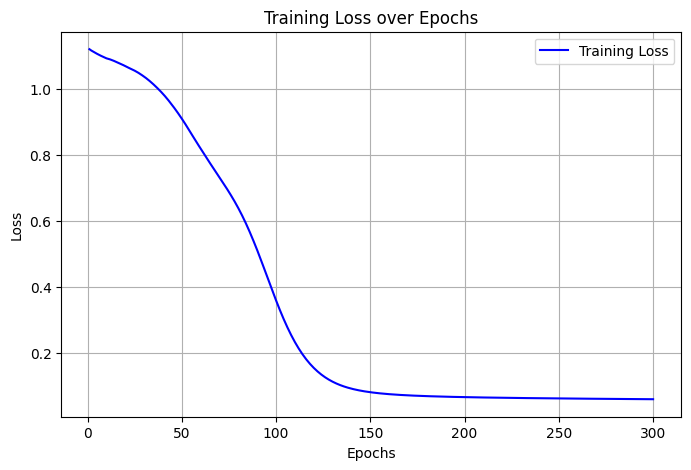

In [15]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_list, loss_values, label='Training Loss', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()

Train Accuracy: 0.9750
Test Accuracy: 1.0000


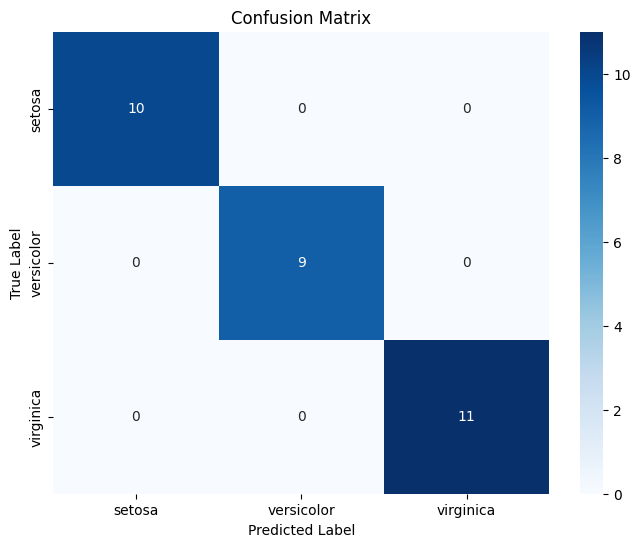

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Test Loss: 0.0569


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Get predictions for training and test data
    y_train_pred = model(X_train_tensor)
    y_test_pred = model(X_test_tensor)

    # Get predicted classes
    _, y_train_pred_class = torch.max(y_train_pred, 1)
    _, y_test_pred_class = torch.max(y_test_pred, 1)

    # Convert predictions to numpy
    y_train_pred_class_np = y_train_pred_class.numpy()
    y_test_pred_class_np = y_test_pred_class.numpy()

    # Calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred_class_np)
    test_accuracy = accuracy_score(y_test, y_test_pred_class_np)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred_class_np)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Classification Report (Precision, Recall, F1 Score, Support)
    report = classification_report(y_test, y_test_pred_class_np, target_names=iris.target_names)
    print("Classification Report:\n", report)

    # Loss function error (on test set)
    test_loss = criterion(y_test_pred, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")
